In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
p = 0.05
n = 25
l= 25
#sqt= 

narray= sorted(np.random.randint(0,1000,10))

anarray= (np.random.randint(10,30,1))

np.random.seed(990)

normal_d = np.random.randn(1000) 

poisson_d = (np.random.poisson(l, 1000) - l) * (1/sqrt(l))

binomial_d = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))

chisq_d = numpy.random.chisquare(anarray, 1000)

#f_obs = numpy.random.chisquare(anarray)
#chisq_d = scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)

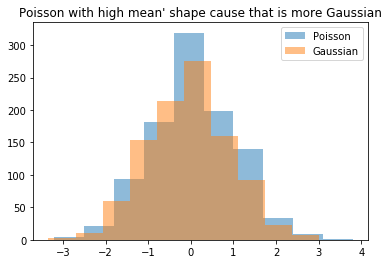

poisson on normal KstestResult(statistic=0.049259709439103017, pvalue=0.01508141065659041)
poisson on normal AndersonResult(statistic=2.1422797314393165, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
In this case the means are similar


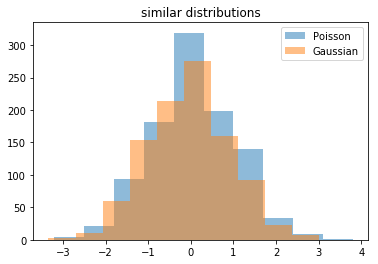

In [3]:
pl.figure()
pl.hist(poisson_d, alpha=0.5, label="Poisson")
pl.hist(normal_d, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("Poisson with high mean' shape cause that is more Gaussian")
pl.show()
print ("poisson on normal", scipy.stats.kstest(poisson_d, 'norm'))
print ("poisson on normal", scipy.stats.anderson(poisson_d, dist='norm'))
print ("In this case the means are similar")


pl.figure()
pl.hist(poisson_d, alpha=0.5, label="Poisson")
pl.hist(normal_d, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

KS: low p-value. p value of 0.015 <0.05: H0 that sample comes from a Gaussian distribution cannot be rejected

AD: the statistic 5.424 is higher than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 can be rejected.

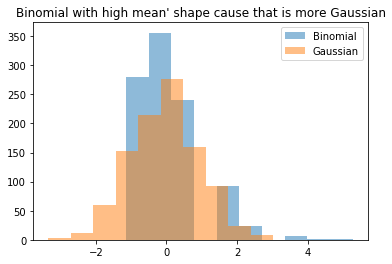

binomal on normal KstestResult(statistic=0.22672709580897832, pvalue=0.0)
binomial on normal AndersonResult(statistic=45.350875859588541, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
In this case the means are similar, but the binomial breaks up unlike the normal


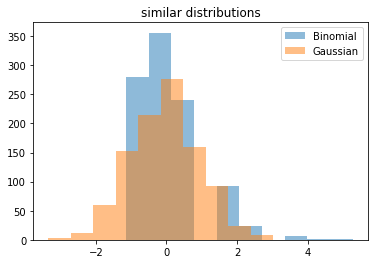

In [4]:
pl.figure()
pl.hist(binomial_d, alpha=0.5, label="Binomial")
pl.hist(normal_d, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("Binomial with high mean' shape cause that is more Gaussian")
pl.show()
print ("binomal on normal", scipy.stats.kstest(binomial_d,'norm'))
print ("binomial on normal", scipy.stats.anderson(binomial_d, dist='norm'))
print ("In this case the means are similar, but the binomial breaks up unlike the normal")

pl.figure()
pl.hist(binomial_d, alpha=0.5, label="Binomial")
pl.hist(normal_d, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

KS: low p-value. p value of 0.0 <0.05: H0 that sample comes from a Gaussian distribution cannot be rejected

AD: the statistic 45.35 is higher than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 can be rejected.

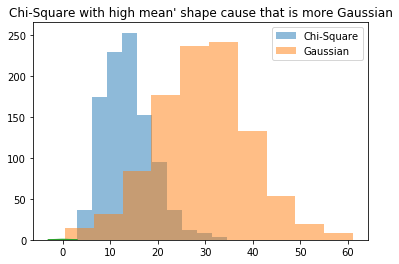

Chi-Square on normal KstestResult(statistic=0.99886945740577482, pvalue=0.0)
Chi-Square on normal AndersonResult(statistic=5.9908365153484056, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
In this case the means are similar, b


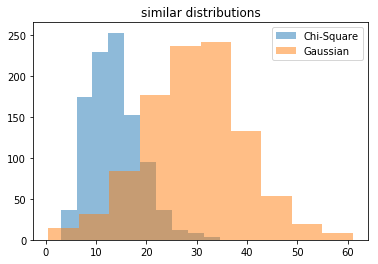

In [5]:
normal_d = np.random.normal(loc=30.0, scale=10, size=1000) 
#loc=0.0, scale=1.0, size=None
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

pl.figure()
pl.hist(chisq_d, alpha=0.5, label="Chi-Square")
pl.hist(normal_d, alpha=0.5, label="Gaussian")
plt.plot(x,mlab.normpdf(x, mu, sigma))
pl.legend()
pl.title("Chi-Square with high mean' shape cause that is more Gaussian")
pl.show()
print ("Chi-Square on normal", scipy.stats.kstest(chisq_d,'norm'))
print ("Chi-Square on normal", scipy.stats.anderson(chisq_d, dist='norm'))
print ("In this case the means are similar, b")



pl.figure()
pl.hist(chisq_d, alpha=0.5, label="Chi-Square")
pl.hist(normal_d, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

KS: low p-value. p value of 0.0 <0.05: H0 that sample comes from a Gaussian distribution cannot be rejected

AD: the statistic 3.376 is higher than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 can be rejected.

In [6]:
distpdf_n, mybins_n, = np.histogram(normal_d, density=True)
distpdf_b, mybins_b, = np.histogram(binomial_d, density=True)
distpdf_p, mybins_p, = np.histogram(poisson_d, density=True)
distpdf_c, mybins_c, = np.histogram(chisq_d, density=True)


In [7]:
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])
bincenters_c = mybins_c[:-1] + 0.5*(mybins_c[1] - mybins_c[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")

print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_b)))

print ("chisq on normal", 
       scipy.stats.entropy(distpdf_c, 
                                scipy.stats.norm.pdf(bincenters_c)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal inf
poisson on normal 0.0122767096114
binomial on normal 0.208315019829
chisq on normal 94.3440674346


In [8]:
print ("poisson on normal", 
       scipy.stats.chisquare(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.chisquare(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_b)))

poisson on normal Power_divergenceResult(statistic=0.036627741479527895, pvalue=0.99999999971348452)
binomial on normal Power_divergenceResult(statistic=1.9455667157090164, pvalue=0.99229940401262784)


In [9]:
threshold = scipy.stats.anderson(normal_d, 
                                 dist='norm')[1][scipy.stats.anderson(normal_d, 
                                                                      dist='norm')[2]==[5.0]]
print (threshold)

[ 0.784]


In [ ]:
Poission

In [25]:
np.random.seed(999)
narray= np.arange(0,1000, 10)
#narray1 =(np.random.randint(0,1000, 10))
ks_s_p = np.zeros(narray.size, dtype= float64)
ks_p_p = np.zeros(narray.size, dtype= float64)
ad_p = np.zeros(narray.size, dtype= float64)
kl_p = np.zeros(narray.size, dtype= float64)
chi_s_p = np.zeros(narray.size, dtype= float64)
chi_p_p = np.zeros(narray.size, dtype= float64)

for i,n in enumerate(narray):
    p = 0.05 
    poisson_d = (np.random.poisson(n, size = 1000) - n) * (1/np.sqrt(l))
    #KS stats
    ks_s_p[i] = scipy.stats.kstest(poisson_d,'norm')[0]
   
    #KS p-values
    ks_p_p[i] = scipy.stats.kstest(poisson_d,'norm')[1]
   
    #AD stat
    ad_p[i] = scipy.stats.anderson(poisson_d, dist='norm')[0]

    
     
    mybins = np.linspace(min(poisson_d), max(poisson_d), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    
    kl_p [i] =  scipy.stats.entropy(np.histogram(poisson_d, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))
    ##https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chisquare.html
    chi_s_p[i] = scipy.stats.chisquare(np.histogram(poisson_d, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))[0]
    chi_p_p[i] = scipy.stats.chisquare(np.histogram(poisson_d, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))[1]


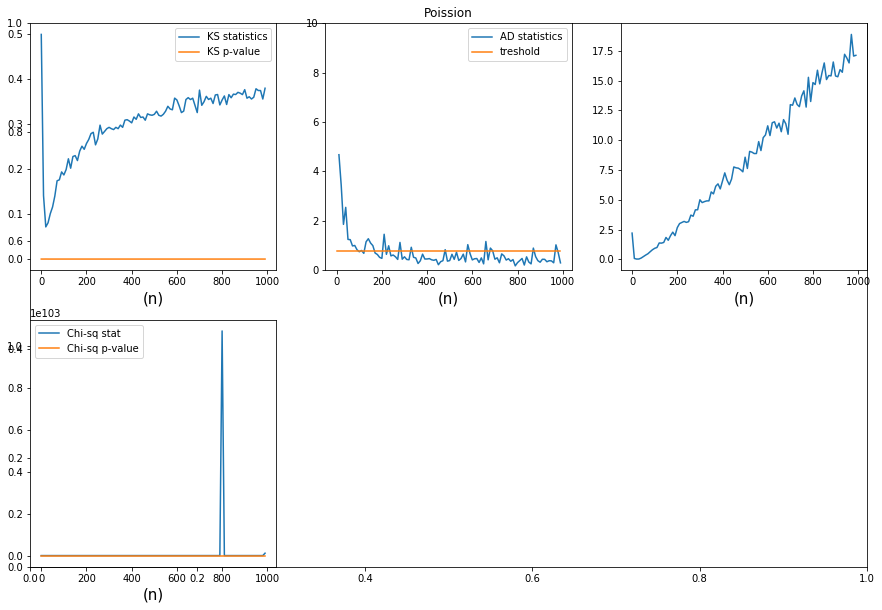

In [11]:
fig = pl.figure(figsize = (15,10))
pl.title("Poission")

fig.add_subplot(231)
pl.plot(narray, ks_s_p, label='KS statistics')
pl.plot(narray, ks_p_p, label='KS p-value')
pl.xlabel('(n)', fontsize = 15)
pl.legend()

fig.add_subplot(232)
pl.plot(narray, ad_p,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.xlabel('(n)', fontsize = 15)
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(233)
pl.xlabel('(n)', fontsize = 15)
pl.plot(narray, kl_p, label='K-L (entropy)')

fig.add_subplot(234)
pl.plot(narray, chi_s_p, label="Chi-sq stat")
pl.plot(narray, chi_p_p, label="Chi-sq p-value")
pl.xlabel('(n)', fontsize = 15)
pl.legend()

In [24]:

np.random.seed(999)

narray= sorted(np.random.randint(1,1000, 100))

narray1 =(np.random.randint(1,1000, 100))
ks_s_bino = np.zeros(narray1.size, dtype= float64)
ks_p_bino = np.zeros(narray1.size, dtype= float64)
ad_bino = np.zeros(narray1.size, dtype= float64)
kl_bino = np.zeros(narray1.size, dtype= float64)
chi_s_bino = np.zeros(narray1.size, dtype= float64)
chi_p_bino = np.zeros(narray1.size, dtype= float64)


#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5
    binomial_d = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    ks_s_bino[i] = scipy.stats.kstest(binomial_d,'norm')[0]
    ks_p_bino[i] = scipy.stats.kstest(binomial_d,'norm')[1]
    ad_bino[i] = scipy.stats.anderson(binomial_d, dist='norm')[0]
    
    
    mybins = np.linspace(min(binomial_d), max(binomial_d), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    
    kl_bino [i] =  scipy.stats.entropy(np.histogram(binomial_d, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))
    ##https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chisquare.html
    chi_s_bino[i] = scipy.stats.chisquare(np.histogram(binomial_d, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))[0]
    chi_p_bino[i] = scipy.stats.chisquare(np.histogram(binomial_d, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))[1]
    #chi_p_bino0 = scipy.stats.chisquare(binomial_d, norm)[1]
    #chi_p_bino.append(chi_p_bino0) 
    
 
    
    
    
    #https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chisquare.html
    #baoling
    #chi_s_bino[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000, scipy.stats.norm.pdf(bincenters))[0]
    #chi_p_bino[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000, scipy.stats.norm.pdf(bincenters))[1]


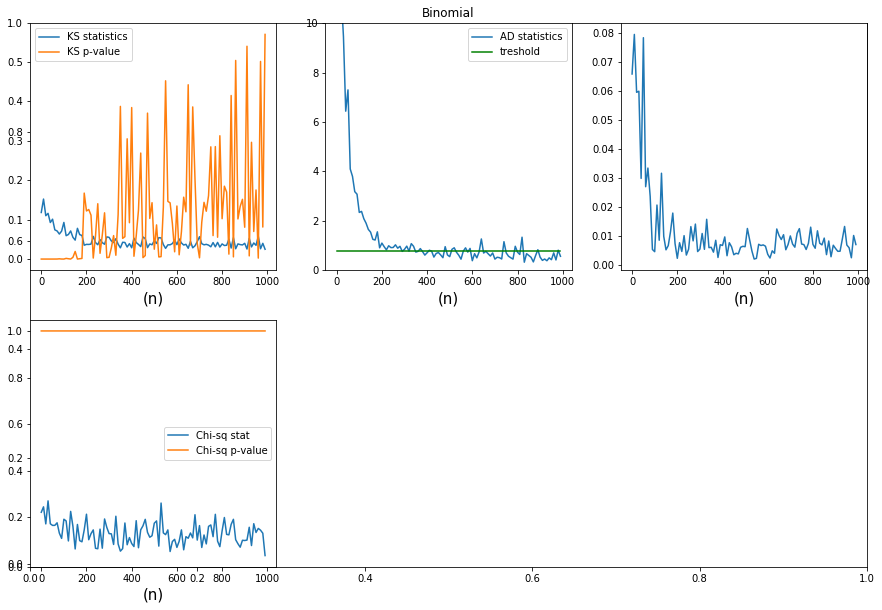

In [31]:
fig = pl.figure(figsize = (15,10))
pl.title("Binomial")
fig.add_subplot(231)
#pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.plot(narray, ks_s_bino, label='KS statistics')
pl.plot(narray, ks_p_bino, label='KS p-value')
pl.xlabel('(n)', fontsize = 15)
pl.legend()

fig.add_subplot(232)
pl.plot(narray, ad_bino,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold", color ="green")
pl.xlabel('(n)', fontsize = 15)
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(233)
pl.xlabel('(n)', fontsize = 15)
pl.plot(narray, kl_bino, label='K-L (entropy)')

fig.add_subplot(234)
#pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.plot(narray, chi_s_bino, label="Chi-sq stat")
pl.plot(narray, chi_p_bino, label="Chi-sq p-value")
pl.xlabel('(n)', fontsize = 15)
pl.legend()


the statistics value will be **larger** if the distributions are **not** likely to be related. 

For KS the stat goes up and down, but down overall and the P value seems to get larger on average with increasing N
For AD the stat drops below the threshhold with increasing N, leading us to reject the Null
The Entropy drops, meaning the distribution is closer to normal




In [26]:

narray1 =(np.random.randint(1,1000, 100))
ks_s_cs = np.zeros(narray1.size, dtype= float64)
ks_p_cs = np.zeros(narray1.size, dtype= float64)
ad_cs = np.zeros(narray1.size, dtype= float64)
kl_cs = np.zeros(narray1.size, dtype= float64)
chi_s_cs = np.zeros(narray1.size, dtype= float64)
chi_p_cs = np.zeros(narray1.size, dtype= float64)


#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5
    ChiSq_d = chisq_d = numpy.random.chisquare(anarray, 1000)
    ks_s_cs[i] = scipy.stats.kstest(ChiSq_d,'norm')[0]
    ks_p_cs[i] = scipy.stats.kstest(ChiSq_d,'norm')[1]
    ad_cs[i] = scipy.stats.anderson(ChiSq_d, dist='norm')[0]
    
    
    mybins = np.linspace(min(ChiSq_d), max(ChiSq_d), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    
    kl_cs [i] =  scipy.stats.entropy(np.histogram(ChiSq_d, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))
    ##https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chisquare.html
    chi_s_cs[i] = scipy.stats.chisquare(np.histogram(ChiSq_d, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))[0]
    chi_p_cs[i] = scipy.stats.chisquare(np.histogram(ChiSq_d, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))[1]
    


   # kl_cs [i] =  scipy.stats.entropy(np.histogram(binomial_d, bins=mybins)[0], 
                                   # scipy.stats.norm.pdf(bincenters) + n)

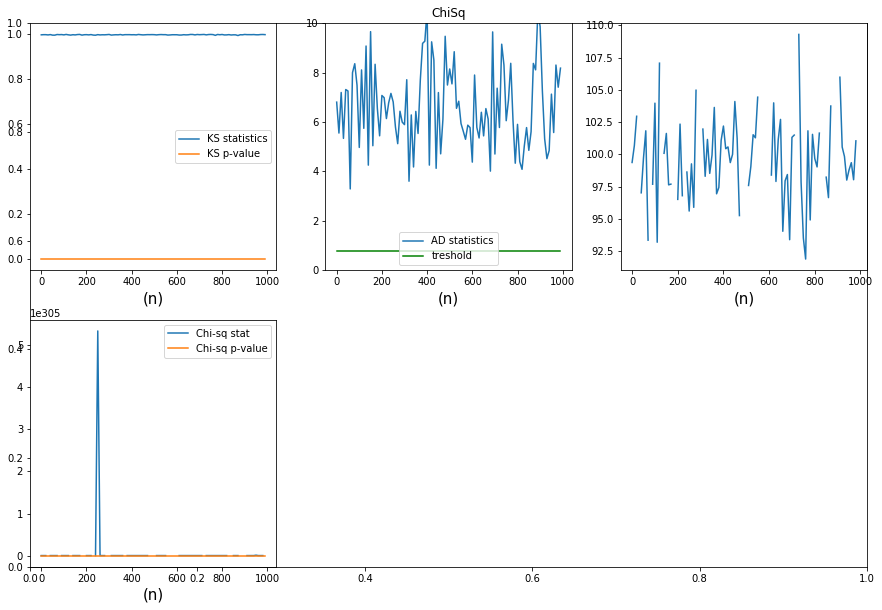

In [33]:

fig = pl.figure(figsize = (15,10))
pl.title('ChiSq')
fig.add_subplot(231)
pl.plot(narray, ks_s_cs, label='KS statistics')
pl.plot(narray, ks_p_cs, label='KS p-value')
pl.xlabel('(n)', fontsize = 15)
pl.legend()

fig.add_subplot(232)
pl.plot(narray, ad_cs,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold", color ="green")
pl.xlabel('(n)', fontsize = 15)
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(233)
pl.xlabel('(n)', fontsize = 15)
pl.plot(narray, kl_cs, label='K-L (entropy)')

fig.add_subplot(234)
pl.plot(narray, chi_s_cs, label="Chi-sq stat")
pl.plot(narray, chi_p_cs, label="Chi-sq p-value")
pl.xlabel('(n)', fontsize = 15)
pl.legend()


In [ ]:
#jack